In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/BreastCancer.csv')

In [ ]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [ ]:
df.shape

(569, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
# feature들을 가져오기 위해 column 명 조회
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
# Unnamed: 32 모두 null이기에 삭제 필요
df.drop("Unnamed: 32", axis=1, inplace=True)

In [ ]:
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

In [ ]:
df.drop('id',axis=1, inplace=True)

In [ ]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

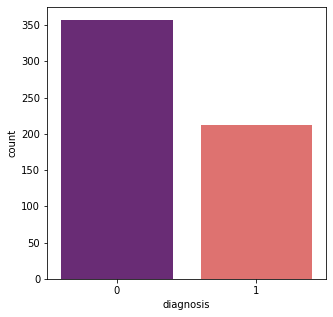

In [ ]:
# countplot 그리기
plt.figure(figsize = (5,5))
sns.countplot(x="diagnosis", data=df, palette='magma')

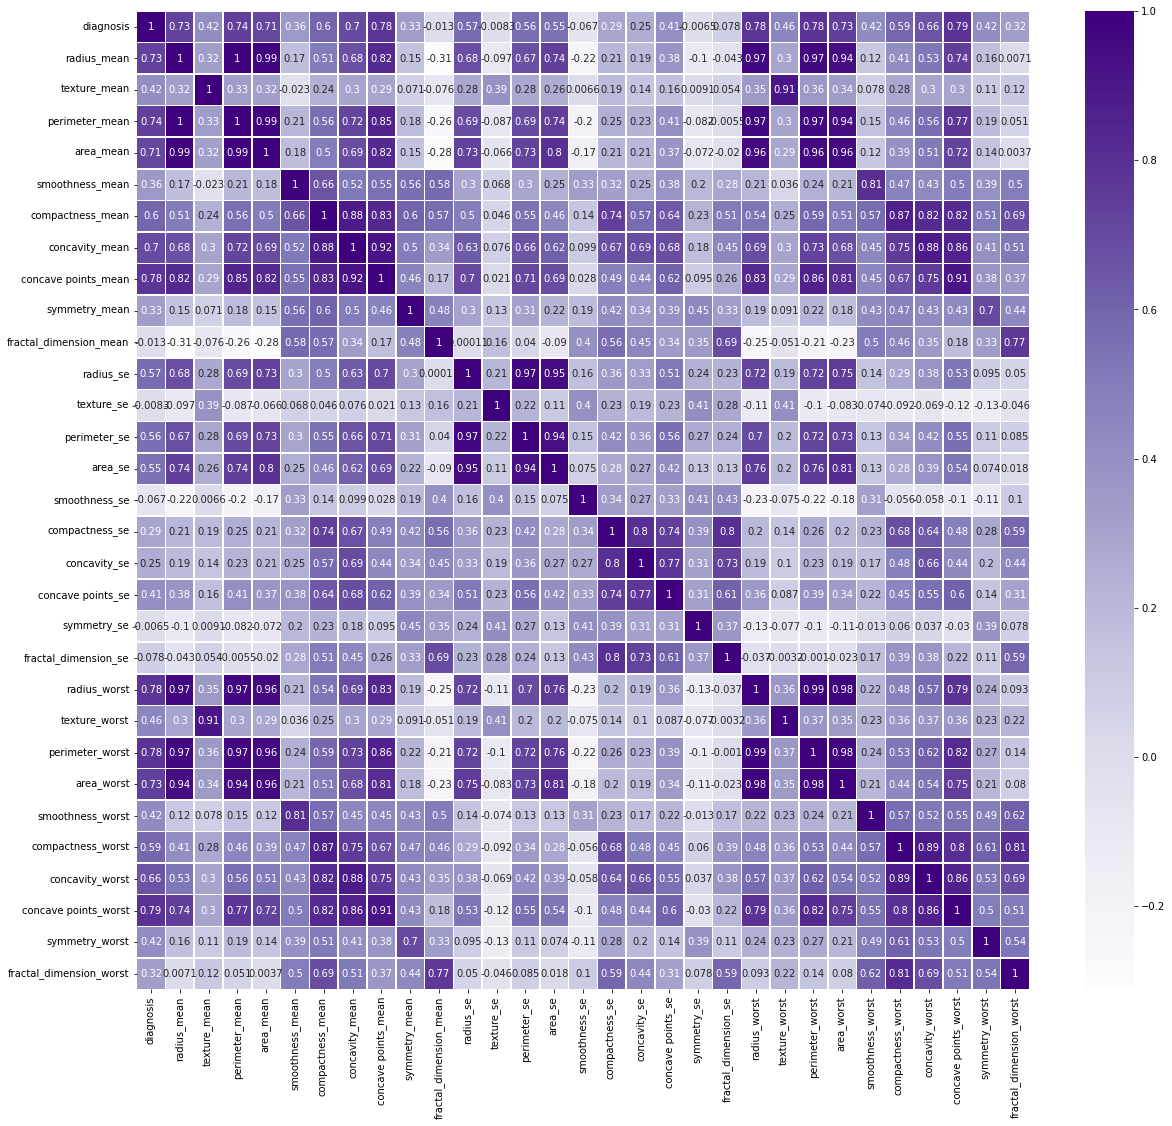

In [ ]:
# heatmap 그리기
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot=True,linewidths=.5, cmap="Purples")

In [ ]:
# Getting Mean Columns with diagnosis
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Getting Se Columns with diagnosis
s_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

# Getting Worst column with diagnosis
w_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

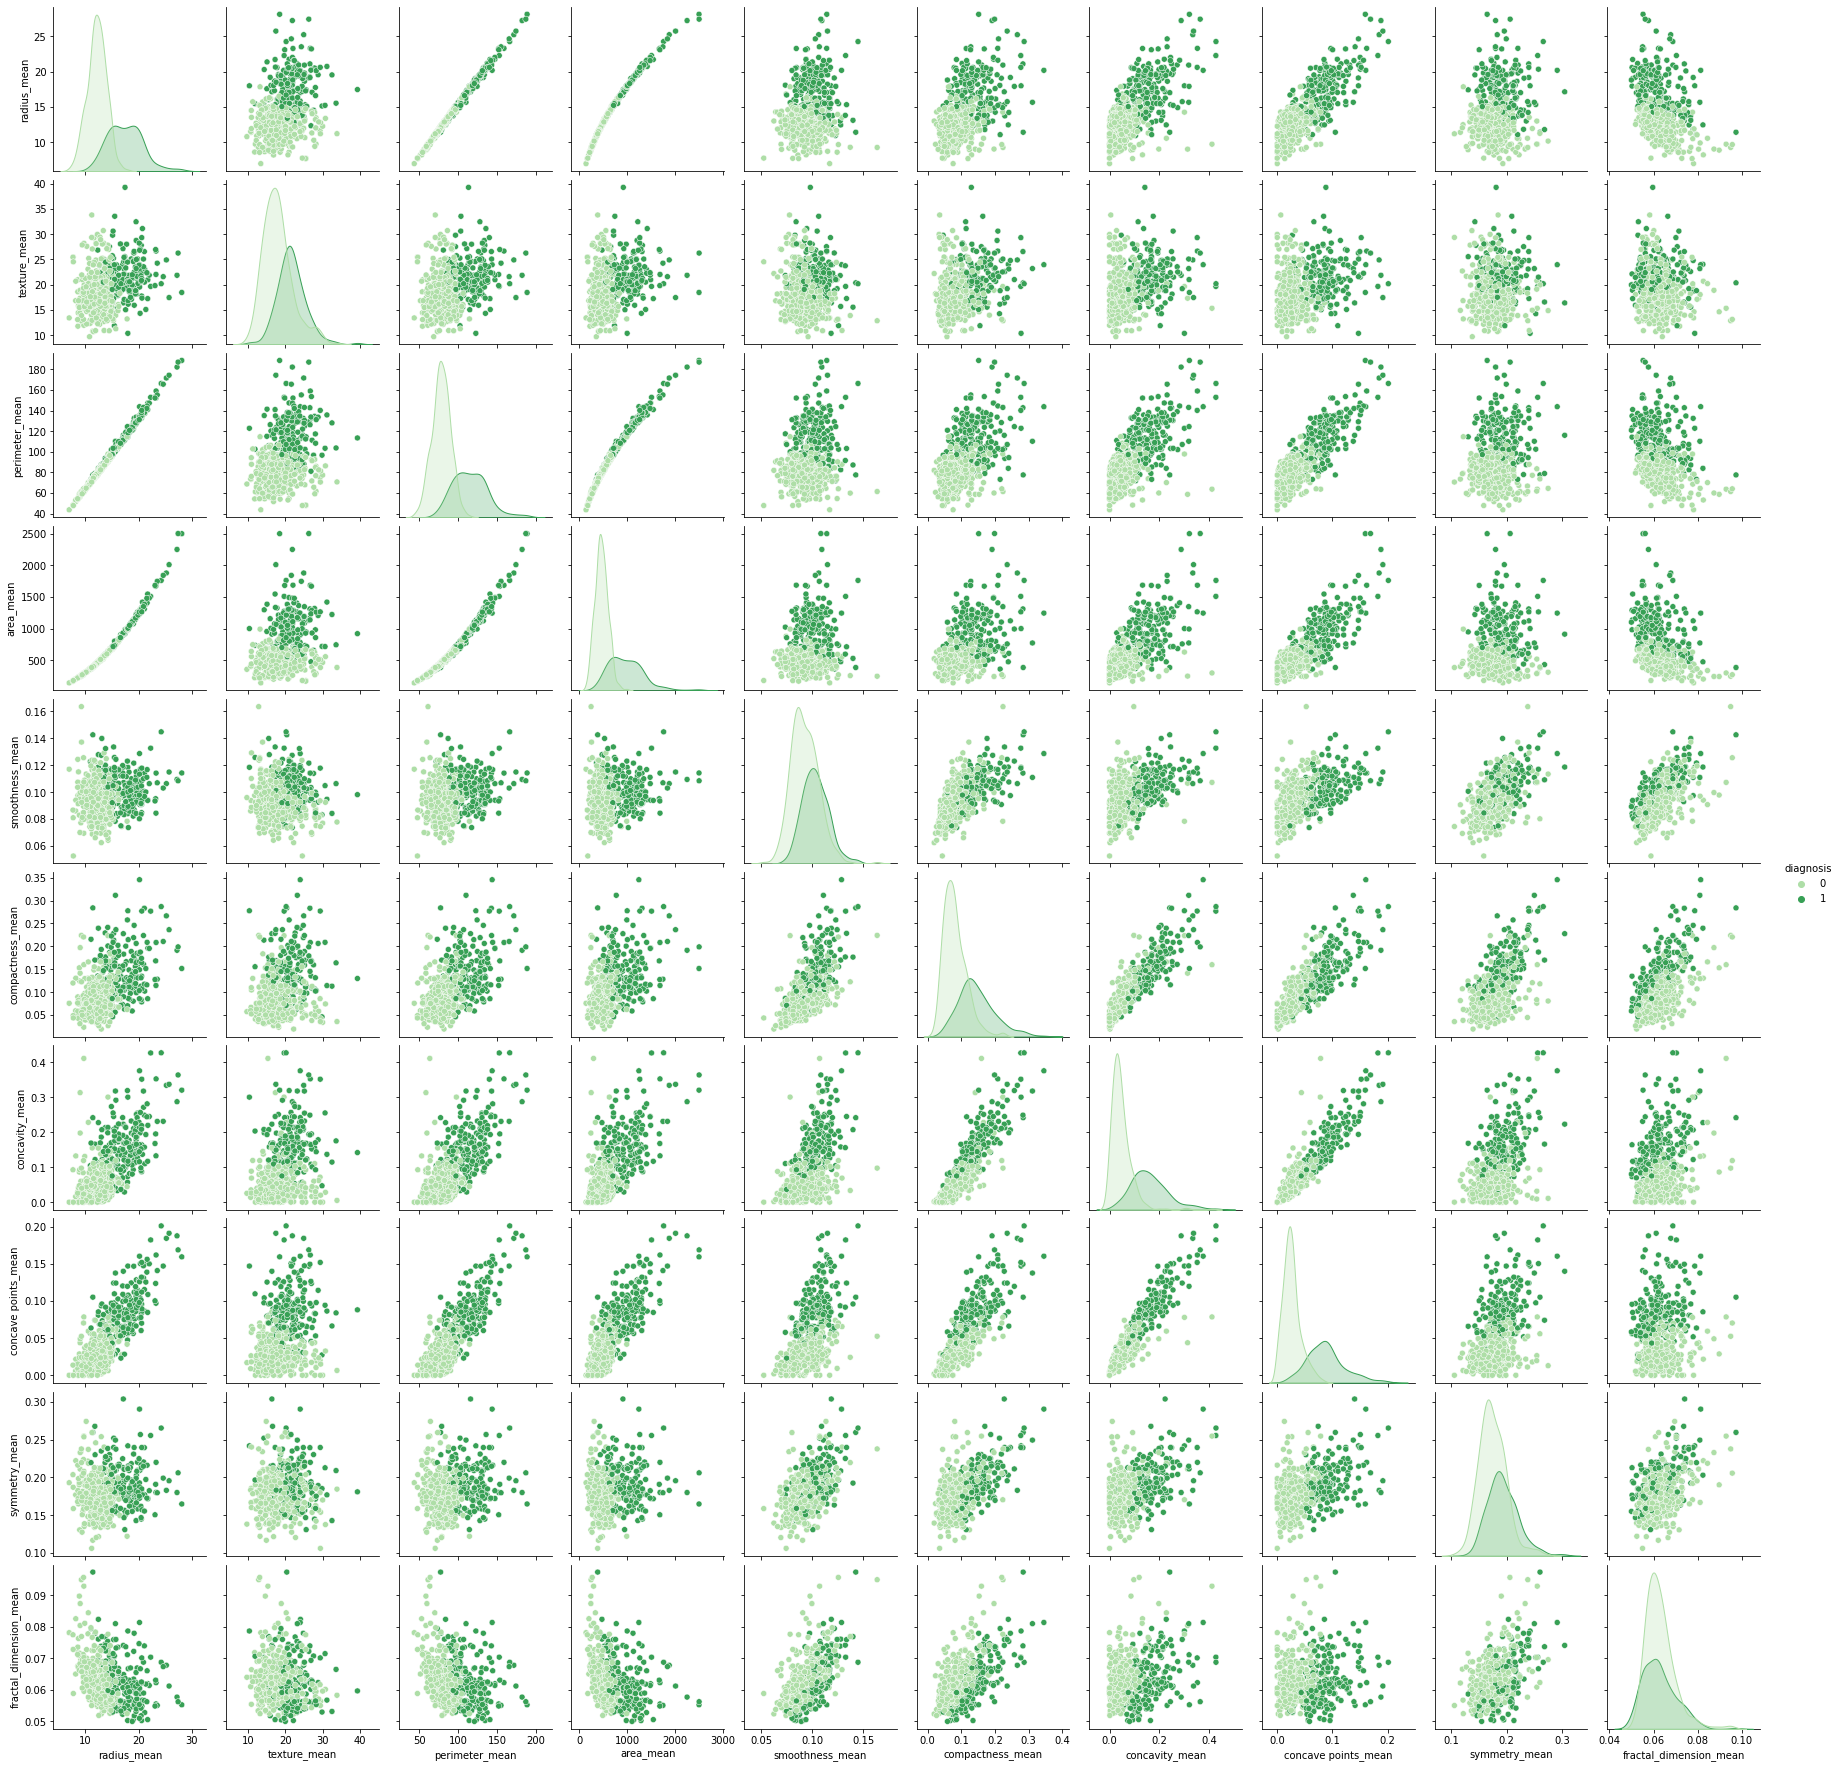

In [ ]:
# pairplot for mean columns
sns.pairplot(df[m_col],hue = 'diagnosis', palette='Greens')

# 문제 1 
- Se column들의 pairplot을 파란색을 이용해 그리시오.[1점]

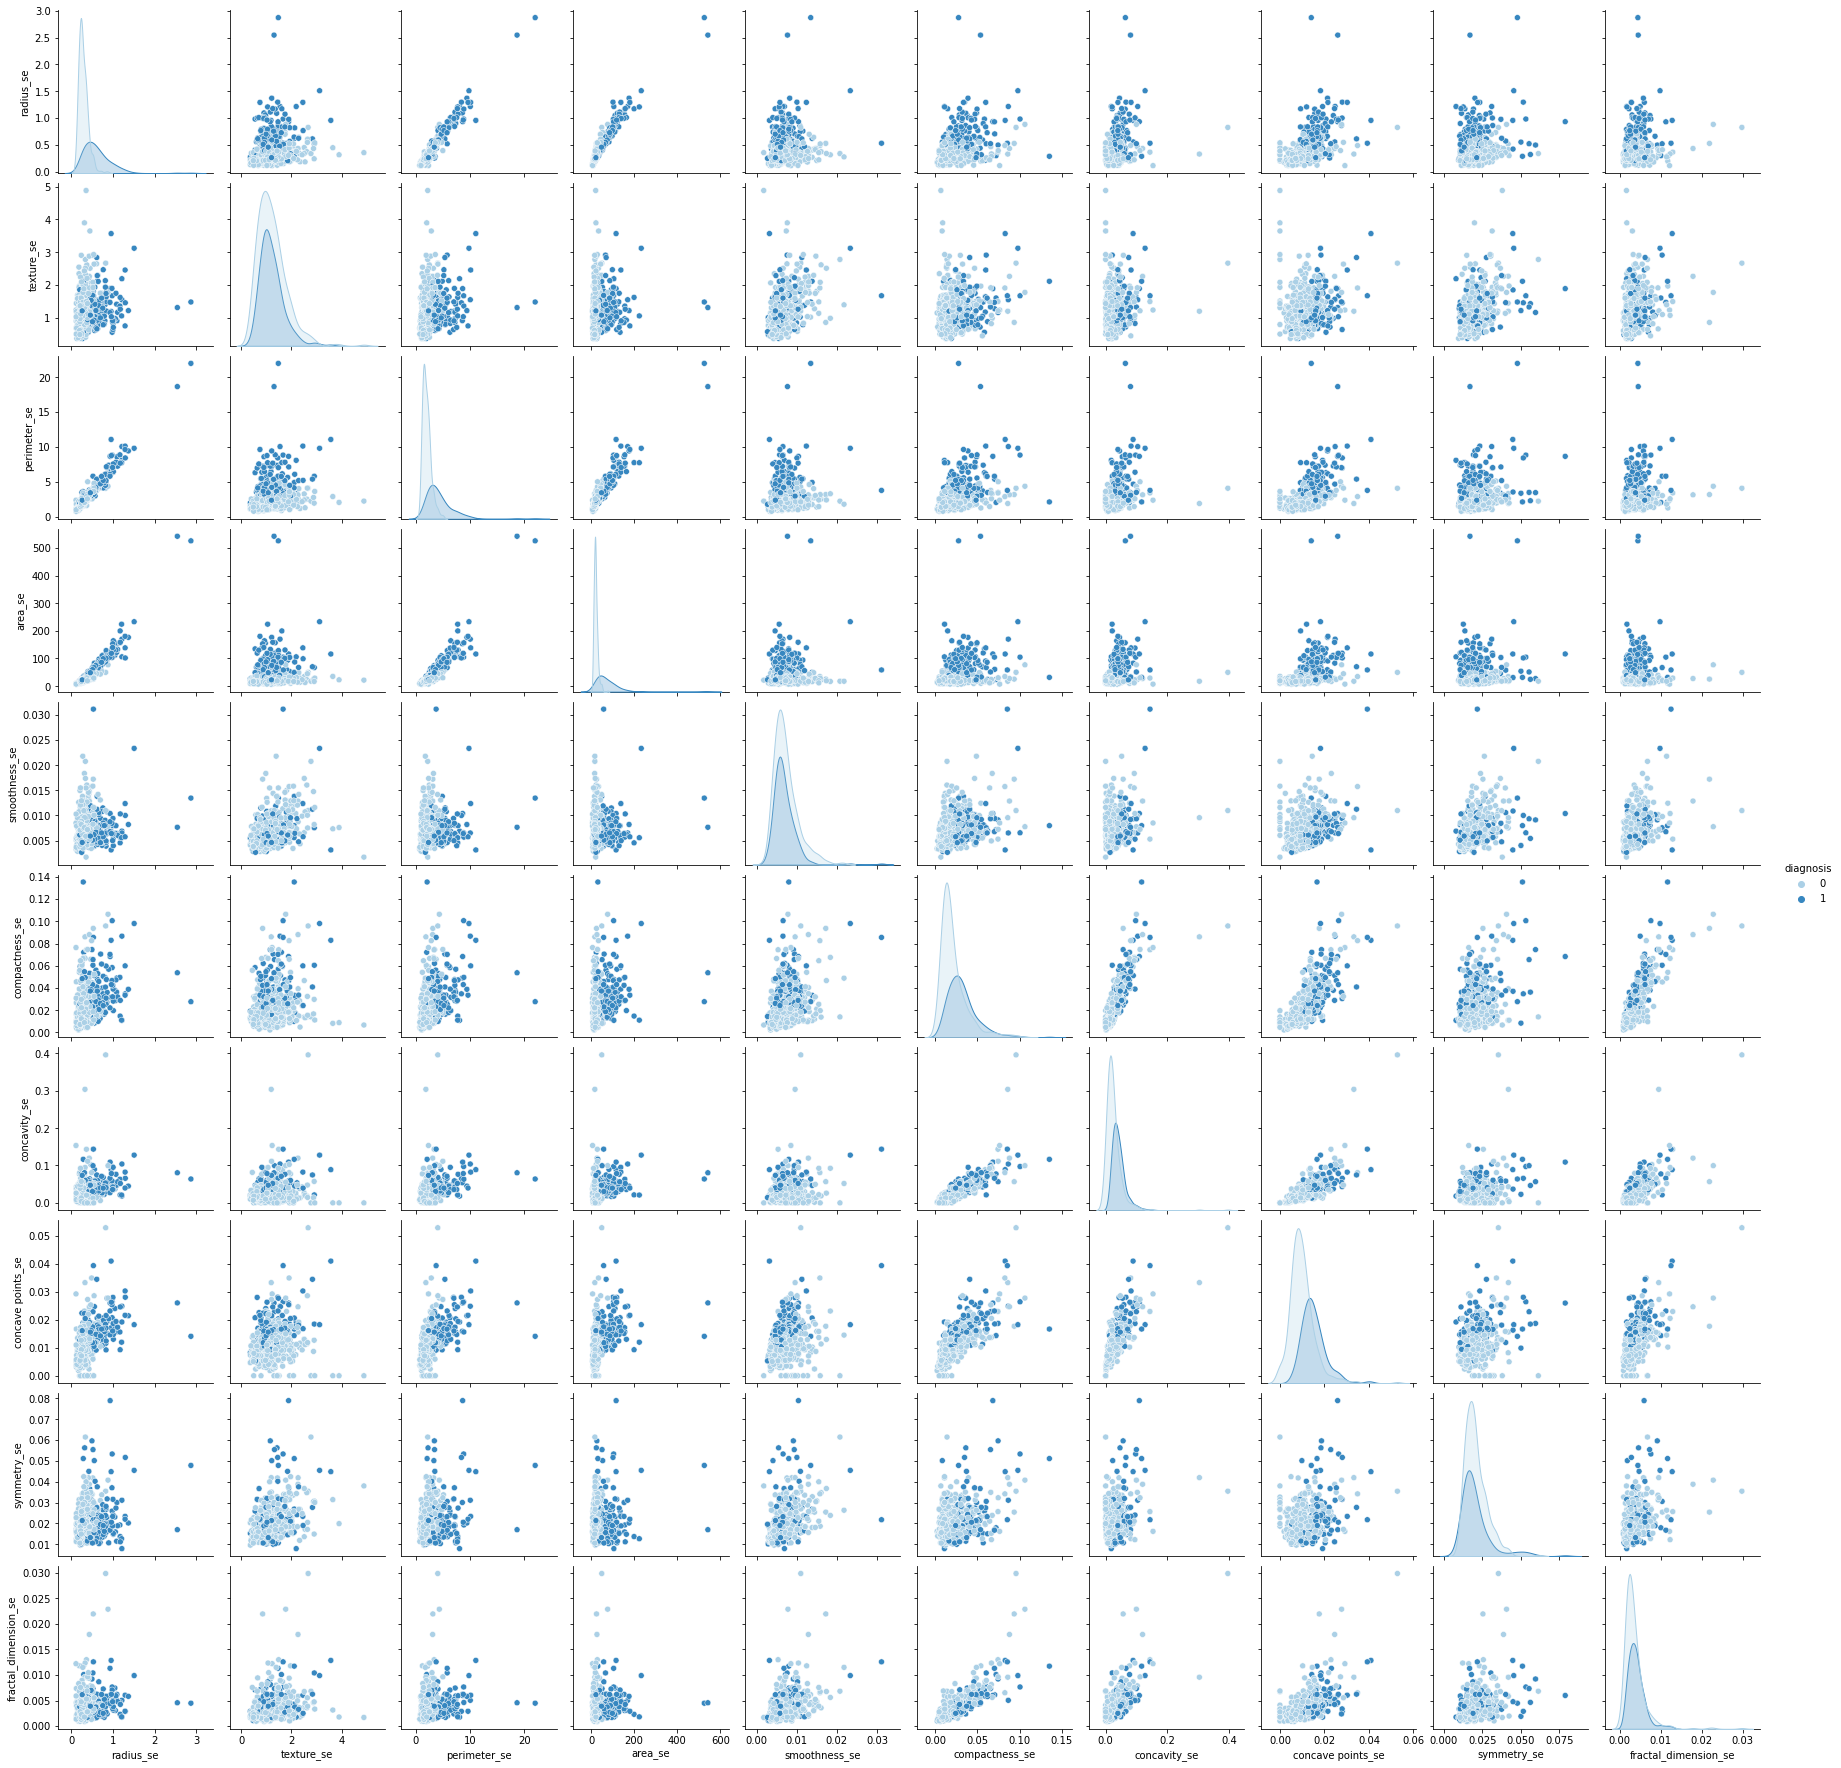

In [ ]:
# pairplot for se columns
sns.pairplot(df[s_col],hue = 'diagnosis', palette='Blues')

# 문제 2 
- Worst column들의 pairplot을 빨갠색을 이용해 그리시오.[1점]

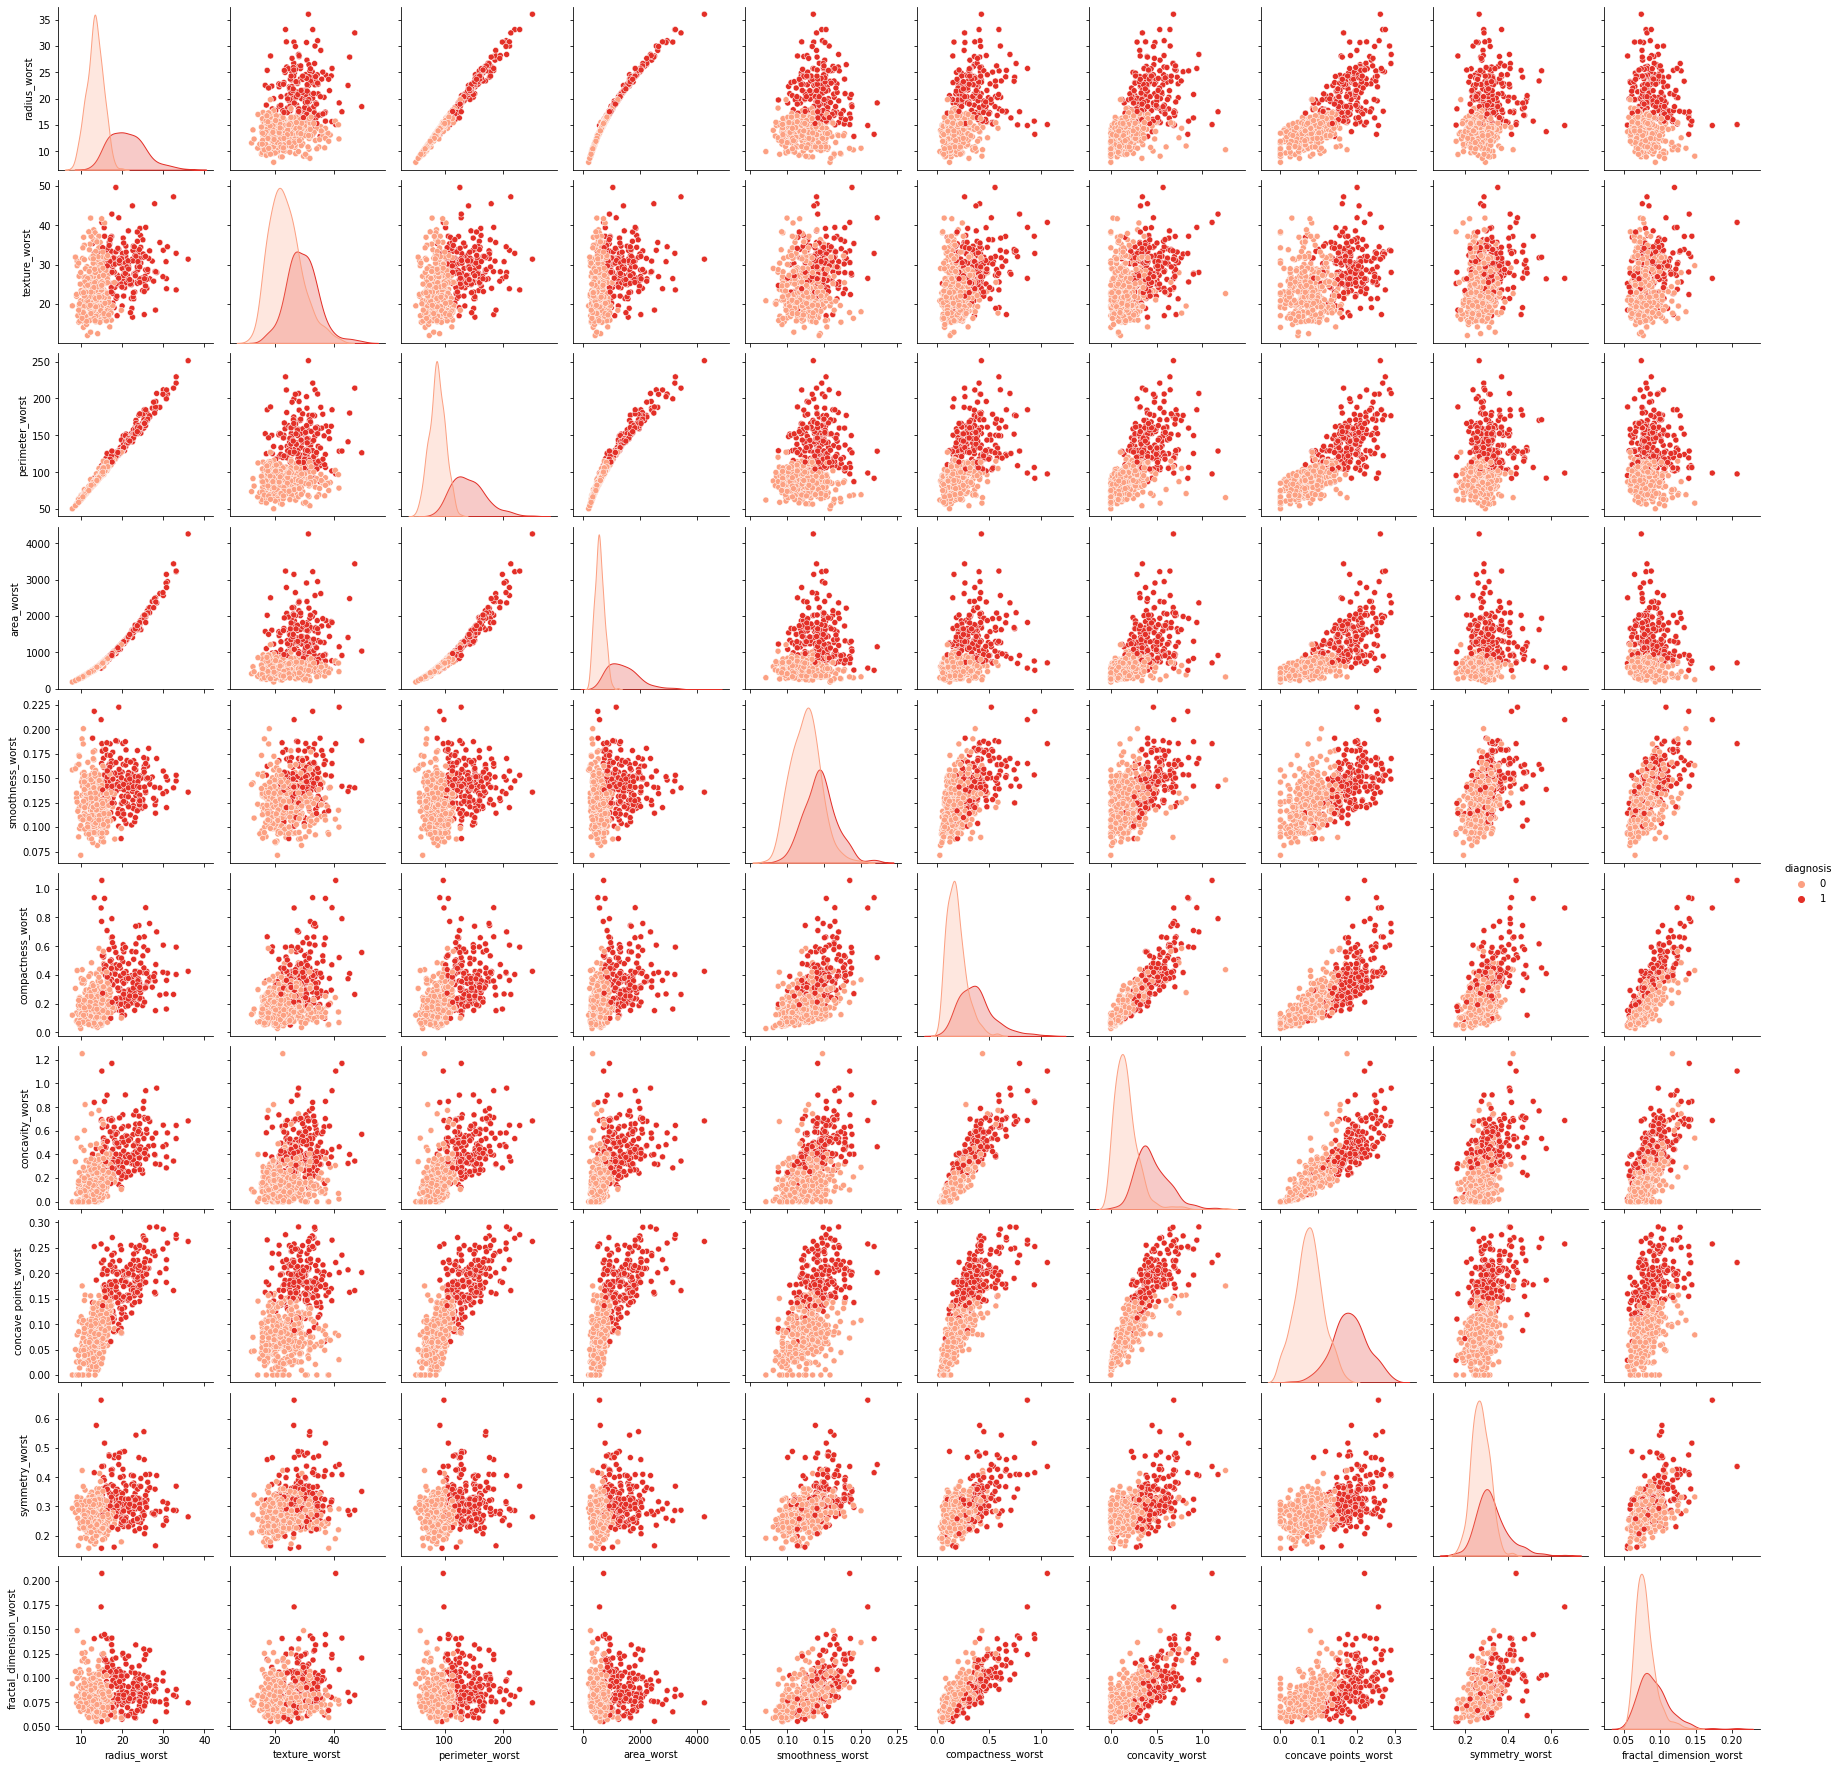

In [ ]:
# pairplot for worst columns
sns.pairplot(df[w_col],hue = 'diagnosis', palette='Reds')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(
                df.drop('diagnosis', axis=1),
                df['diagnosis'],
                test_size=0.2,
                random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (455, 30)
Shape of test set: (114, 30)


# 문제 3
- StandardScala를 이용해 X_train과 X_test 데이터 스케일링을 수행하시오.[2점]

In [ ]:
from sklearn.preprocessing import StandardScaler

# 스케일링하기
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.fit_transform(X_test)

# SVC 모델 만들기

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC

svc_model = SVC(kernel="rbf", probability=True)
svc_model.fit(X_train, y_train)
pred_svc = svc_model.predict(X_test)

print("Confusion Matrix: \n", confusion_matrix(y_test, pred_svc))
print("\n")
print(classification_report(y_test, pred_svc))

Confusion Matrix: 
 [[71  0]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# 문제 4
- Logistic Regression 모델 만들고 성능 평가하시오.[2점]

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)
pred_LR = LR.predict(X_test)

print("Confusion Matrix: \n", confusion_matrix(y_test, pred_LR))
print('\n')
print(classification_report(y_test, pred_LR))

Confusion Matrix: 
 [[71  0]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# 문제 5 
- KNeighborsClassifier(k=3) 모델 만들고 성능 평가하시오.[2점]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
pred_KNN = KNN.predict(X_test)

print("Confusion Matrix: \n", confusion_matrix(y_test, pred_KNN))
print('\n')
print(classification_report(y_test, pred_KNN))

Confusion Matrix: 
 [[69  2]
 [ 3 40]]


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# 문제 6
- Random Forest 모델 (트리 500개) 만들고 성능 평가하시오.[2점]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=500)
RFC.fit(X_train, y_train)
pred_RFC = RFC.predict(X_test)

print("Confusion Matrix: \n", confusion_matrix(y_test, pred_RFC))
print("\n")
print(classification_report(y_test, pred_RFC))

Confusion Matrix: 
 [[70  1]
 [ 3 40]]


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [('SVC', svc_model), ('Log_Reg', LR), ('KNN', KNN), ('Random_Forest', RFC)], voting='hard')
    
voting.fit(X_train, y_train)
pred_voting = voting.predict(X_test)

print("Confusion Matrix: \n", confusion_matrix(y_test, pred_voting))
print("\n")
print(classification_report(y_test, pred_voting))

Confusion Matrix: 
 [[71  0]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
voting2 = VotingClassifier(estimators = [('SVC', svc_model), ('Log_Reg', LR), ('KNN', KNN), ('Random_Forest', RFC)], 
                          voting='soft', weights=[4, 1, 1, 1], flatten_transform=True)
    
voting2.fit(X_train, y_train)

pred_voting2 = voting.predict(X_test)

print("Confusion Matrix: \n", confusion_matrix(y_test, pred_voting2))
print("\n")
print(classification_report(y_test, pred_voting2))

y_score = voting2.predict_proba(X_test)[:,1]>0.5

print("Confusion Matrix: \n", confusion_matrix(y_test, y_score))
print("\n")
print(classification_report(y_test, y_score))

Confusion Matrix: 
 [[71  0]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix: 
 [[71  0]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

